# Load the data and deal with na values

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.feature_selection import chi2

In [72]:
lending_data=pd.read_csv('credit_numeric.csv')

In [73]:
lending_data.dropna(subset=['dti'],inplace=True)
lending_data.dropna(subset=['avg_cur_bal'],inplace=True)
lending_data.dropna(subset=['inq_last_6mths'],inplace=True)
lending_data.dropna(subset=['open_il_12m'],inplace=True)
lending_data.dropna(subset=['percent_bc_gt_75'],inplace=True)

In [74]:
pd.options.display.max_rows=None
lending_data.isnull().sum()

loan_amnt                              0
term                                   0
int_rate                               0
installment                            0
annual_inc                             0
emp_length                             0
dti                                    0
avg_cur_bal                            0
delinq_2yrs                            0
delinq_amnt                            0
inq_last_6mths                         0
open_acc                               0
open_il_12m                            0
num_accts_ever_120_pd                  0
num_actv_bc_tl                         0
num_bc_tl                              0
num_il_tl                              0
num_op_rev_tl                          0
num_rev_accts                          0
num_tl_90g_dpd_24m                     0
percent_bc_gt_75                       0
pub_rec                                0
pub_rec_bankruptcies                   0
revol_bal                              0
revol_util      

In [75]:
# avoid multicollinearity
lending_data.drop(['sub_grade:G5','verification_status:Verified','purpose:wedding','home_ownership:RENT','addr_state:WY'],axis=1,inplace=True)


# Logistic regression

In [76]:
# split training set and test set
x_train,x_test,y_train,y_test=train_test_split(lending_data.drop('default_or_not',axis=1),lending_data['default_or_not'],test_size=0.2,random_state=1234)

In [77]:
# set the maximum iteration equals to 1000
Reg=LogisticRegression(max_iter=1000)
Reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
explanatory_var=x_train.columns.values

In [79]:
summary=pd.DataFrame(columns=['explanatory_var'],data=explanatory_var)
summary['Coefficient']=np.transpose(Reg.coef_)
summary.index=summary.index+1
summary.loc[0]=['Intercept',Reg.intercept_[0]]
summary=summary.sort_index()


In [80]:
Reg.score(x_train,y_train)
scores,p_value=chi2(x_train,y_train)

In [81]:
summary=pd.DataFrame(columns=['explanatory_var'],data=explanatory_var)
summary['Coefficient']=np.transpose(Reg.coef_)
summary['p_value']=np.transpose(p_value)

In [98]:
# add the intercept value into the table
summary.index=summary.index+1
summary.loc[0]=['Intercept',Reg.intercept_[0],'-']
summary=summary.sort_index()

In [83]:
summary

,explanatory_var,Coefficient,p_value
0,Intercept,-1.074687e-05,-
1,loan_amnt,4.581936e-05,0
2,term,-1.688865e-04,0
3,int_rate,4.527696e-05,0
4,installment,-5.724970e-04,0
5,annual_inc,-2.059007e-06,0
6,emp_length,-7.914974e-05,0
7,dti,-1.139441e-04,0
8,avg_cur_bal,-2.299647e-05,0
9,delinq_2yrs,-1.386987e-07,9.36935e-83


# Predicting model

In [84]:
y_hat=Reg.predict(x_test)

In [85]:
y_hat_prob=Reg.predict_proba(x_test)

In [86]:
y_hat_prob=pd.DataFrame(y_hat_prob[:,1] ) #The prob of defaulters

In [87]:
y_test.reset_index(drop=True,inplace=True)
actual_predict=pd.concat([y_test,y_hat_prob],axis=1)

In [88]:
actual_predict.columns=['actual_y','predict_y']

In [89]:
actual_predict.index=y_test.index

In [90]:
actual_predict.head()

,actual_y,predict_y
0,0,0.413270
1,1,0.350600
2,0,0.485901
3,0,0.297684
4,0,0.364077


# Confusion matrix

In [91]:
# assume the cutoff threshold is 0.5
threshold=0.5
actual_predict['predict_hat_y']=np.where(actual_predict['predict_y']>threshold,1,0)

In [92]:
Confusion_matrix=pd.crosstab(actual_predict['actual_y'],actual_predict['predict_hat_y'],rownames=['actual'],colnames=['predict'])/actual_predict.shape[0]

In [93]:
Confusion_matrix

predict,0,1
actual,,
0,0.697777,0.007175
1,0.287306,0.007741


In [94]:
overall_accuracy=Confusion_matrix.iloc[1,1]+Confusion_matrix.iloc[0,0]
overall_accuracy

0.7055185040603917

# Plot the ROC curve

In [95]:
False_pos_rate,True_pos_rate,threshold=roc_curve(actual_predict['actual_y'],actual_predict['predict_y'])

Text(0.5, 1.0, 'ROC curve')

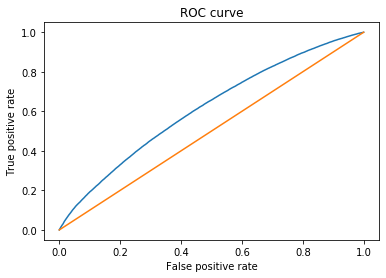

In [96]:
plt.plot(False_pos_rate,True_pos_rate)
plt.plot(False_pos_rate,False_pos_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')



# AUC for the model

In [97]:
AUC=roc_auc_score(actual_predict['actual_y'],actual_predict['predict_y'])
AUC

0.6134906011875603